In [1]:
#importing the required libraries, modules and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file through pandas

df = pd.read_csv("train.csv")
df

#but i want to know something the type of rows of the data here
for i in df.columns:
    print(i,":",type(df[i][0]))

ID : <class 'str'>
Delivery_person_ID : <class 'str'>
Delivery_person_Age : <class 'str'>
Delivery_person_Ratings : <class 'str'>
Restaurant_latitude : <class 'numpy.float64'>
Restaurant_longitude : <class 'numpy.float64'>
Delivery_location_latitude : <class 'numpy.float64'>
Delivery_location_longitude : <class 'numpy.float64'>
Order_Date : <class 'str'>
Time_Orderd : <class 'str'>
Time_Order_picked : <class 'str'>
Weatherconditions : <class 'str'>
Road_traffic_density : <class 'str'>
Vehicle_condition : <class 'numpy.int64'>
Type_of_order : <class 'str'>
Type_of_vehicle : <class 'str'>
multiple_deliveries : <class 'str'>
Festival : <class 'str'>
City : <class 'str'>
Time_taken(min) : <class 'str'>


In [3]:
#Preprocessing the data:

#1.Dropping unwanted columns here:
df.drop(['ID'],axis = 1,inplace = True)

df.drop(['Delivery_person_ID'],axis = 1,inplace =  True)

df.drop(['Order_Date'],axis = 1, inplace = True)


#lets change the column time taken into the numeric form lets do this thing:
for i in range(0,len(df['Time_taken(min)'])):
    df['Time_taken(min)'][i] = df['Time_taken(min)'][i][6:8]







#Before handling the null values first we want to convert the thing into numeric lets do this thing:

cols_to_convert = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)'
]

# Clean and convert to numeric
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.strip()  # remove trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, invalid -> NaN






# Also clean categorical columns
cat_cols = ['Weatherconditions', 'Road_traffic_density', 'Festival', 'City']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().replace('NaN', pd.NA)


#this column is in the format of time here:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time








#2. Handling the null values inside the columns:
for i in df.columns:
    if df[i].isna().sum() > 0:
        print(i," : ",df[i].isna().sum()/len(df[i]) * 100)


Delivery_person_Age  :  4.066413703858048
Delivery_person_Ratings  :  4.184852937951001
Time_Orderd  :  3.7966354484241003
Road_traffic_density  :  1.318184809071568
multiple_deliveries  :  2.177965915820411
Festival  :  0.5000767661702454
City  :  2.631982979843397


In [4]:
#filling the missing values by using mode

m1 = df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'].fillna(m1,inplace = True)

m2 = df['Vehicle_condition'].mode()[0]
df['Vehicle_condition'].fillna(m2,inplace = True)

In [5]:
md1 = df['Delivery_person_Age'].median()
df['Delivery_person_Age'].fillna(md1, inplace = True)

md2 = df['Delivery_person_Ratings'].median()
df['Delivery_person_Ratings'].fillna(md2, inplace = True)

md3 = df['Time_Orderd'].mode()[0]
df['Time_Orderd'].fillna(md3,inplace = True)

md4 = df['Weatherconditions'].mode()[0]
df['Weatherconditions'].fillna(md4, inplace = True)

md5 = df['Road_traffic_density'].mode()[0]
df['Road_traffic_density'].fillna(md5, inplace = True)

md7 = df['Festival'].mode()[0]
df['Festival'].fillna(md7,inplace = True)

md8 = df['City'].mode()[0]
df['City'].fillna(md8,inplace = True)

print(type(df['Delivery_person_Age'][0]))

<class 'numpy.float64'>


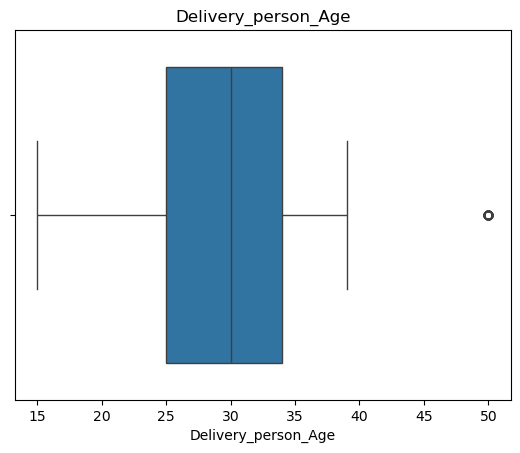

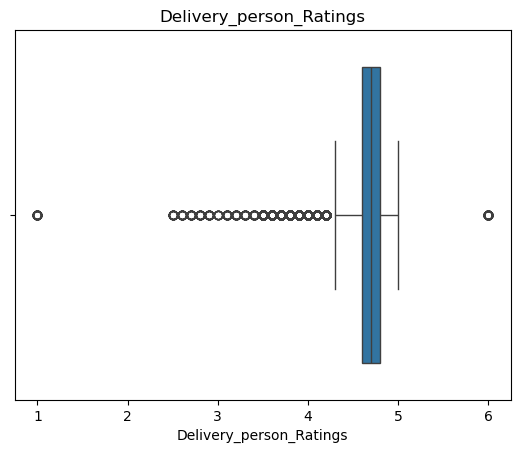

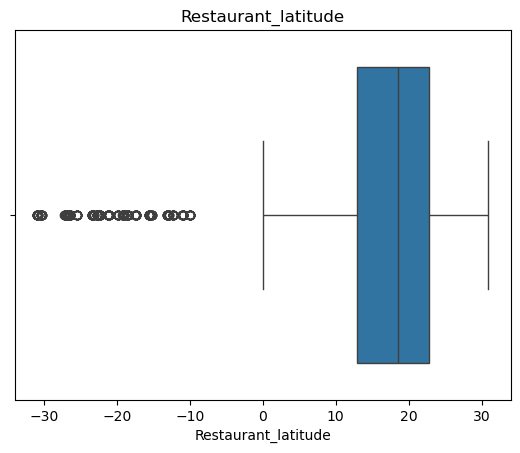

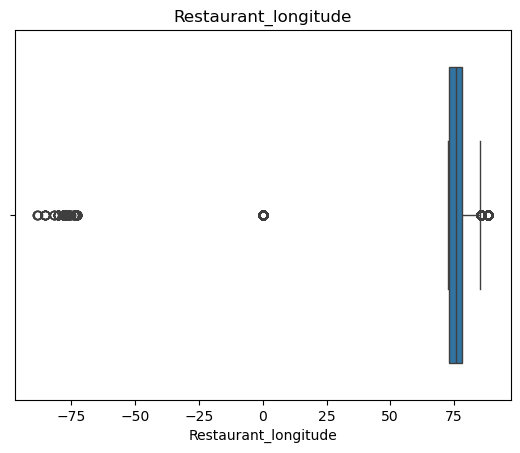

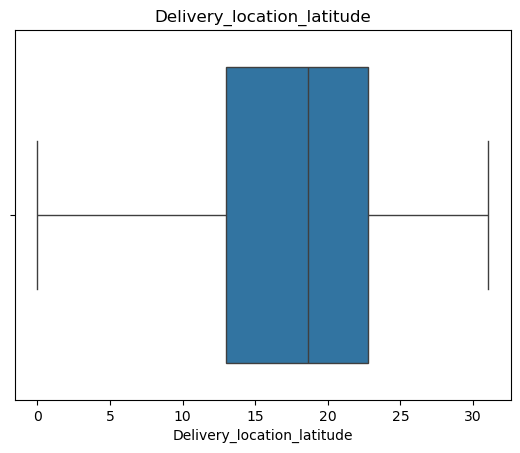

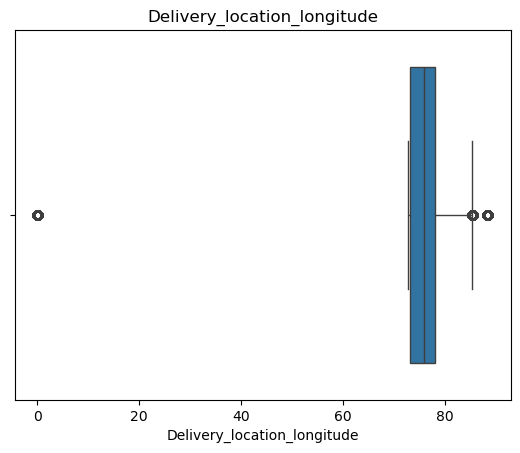

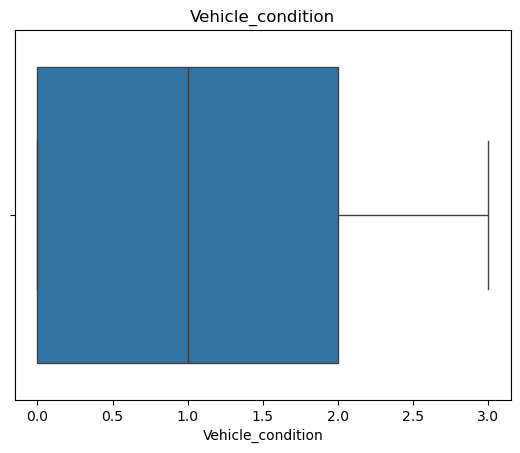

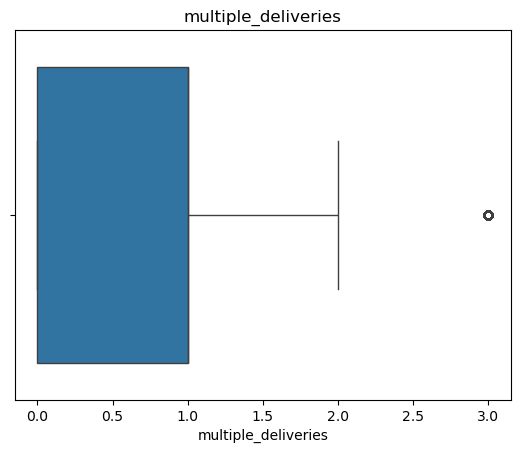

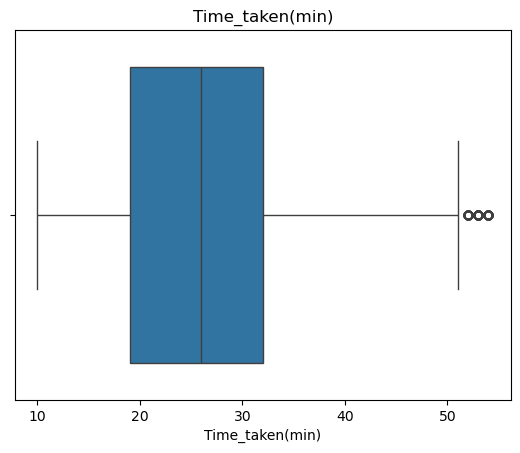

In [6]:
#modifying Outliers:

#they are saying to use pandas to check the data type

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(x = df[col])
        plt.title(col)
        plt.show()

In [7]:
#IQR : is a another method to know the outliers of the columns

DQR = df['Delivery_person_Age'].quantile(0.75) - df['Delivery_person_Age'].quantile(0.25)
upper = df['Delivery_person_Age'].quantile(0.75) + 1.5 * (DQR)
lower = df['Delivery_person_Age'].quantile(0.25) - 1.5 * (DQR)
df['Delivery_person_Age'] = np.where(df['Delivery_person_Age'] > upper, upper, np.where(df['Delivery_person_Age'] < lower, lower, df['Delivery_person_Age']))

#Preprocessing and Data cleaning was completed knowing the power of Pandas such as to convert the data into numeric and seeing particular thing

In [8]:
#After refining the dataset now its info:

df.shape

(45593, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  float64
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Time_Orderd                  45593 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            45593 non-null  object 
 9   Road_traffic_density         45593 non-null  object 
 10  Vehicle_condition            45593 non-null  int64  
 11  Type_of_order                45593 non-null  object 
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

In [10]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.581833,4.636552,17.017729,70.231332,17.465186,70.845702,1.023359,0.750225,26.294607
std,5.686546,0.327906,8.185109,22.883647,7.335122,21.118812,0.839065,0.567430,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,47.500000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


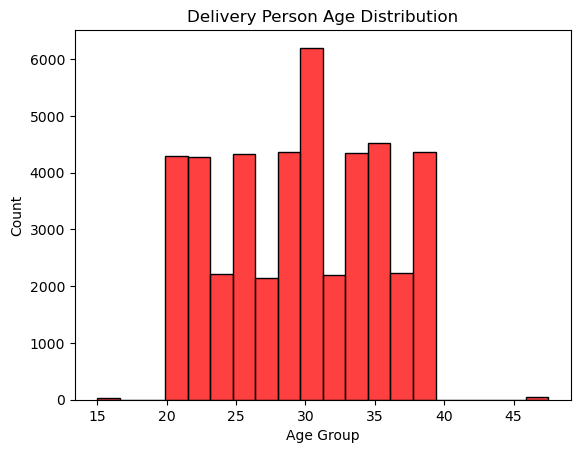

In [11]:
#Visualising the given data:

#numeric data in histograms
sns.histplot(df.Delivery_person_Age,bins= 20,kde=False,color = 'Red')
plt.title("Delivery Person Age Distribution")
plt.xlabel("Age Group")
plt.show()

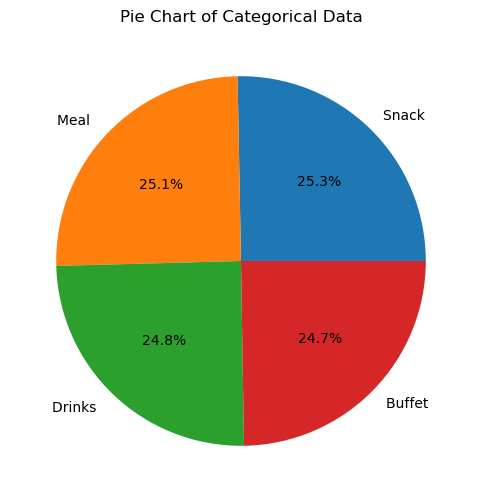

In [12]:
#Categorical Data in Pie Chart:

frequency = df['Type_of_order'].value_counts()

plt.figure(figsize = (10,6))
plt.pie(frequency, labels = frequency.index, autopct = '%1.1f%%')
plt.title("Pie Chart of Categorical Data")
plt.show()

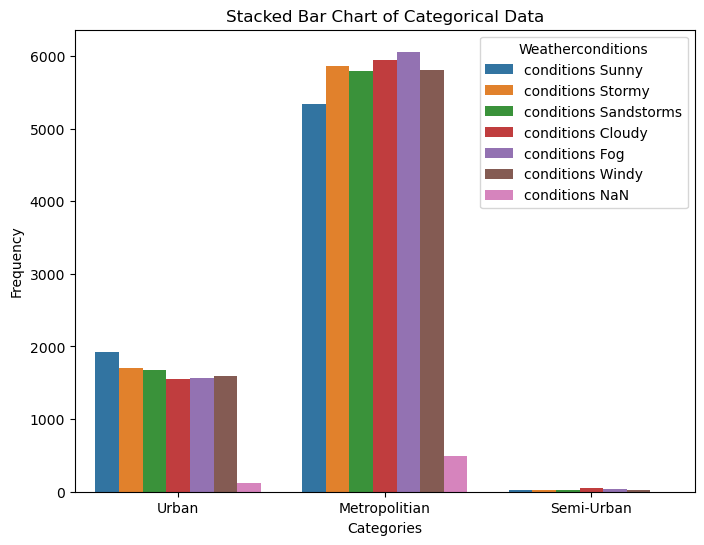

In [13]:
#Bivariate analysis Pictorial representation between two columns:

#Create a stacked bar plot
frequency = df['City'].value_counts()
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'City', hue = 'Weatherconditions')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Categorical Data')
plt.legend(title = 'Weatherconditions')
plt.show()

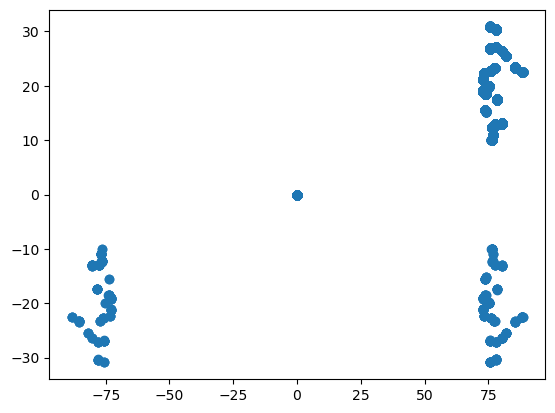

In [14]:
#By using scatterplots we can use to show the clustering:
#Relation between latitude and longitude

plt.scatter(x = df['Restaurant_longitude'],y = df['Restaurant_latitude'])
plt.show()

<Axes: >

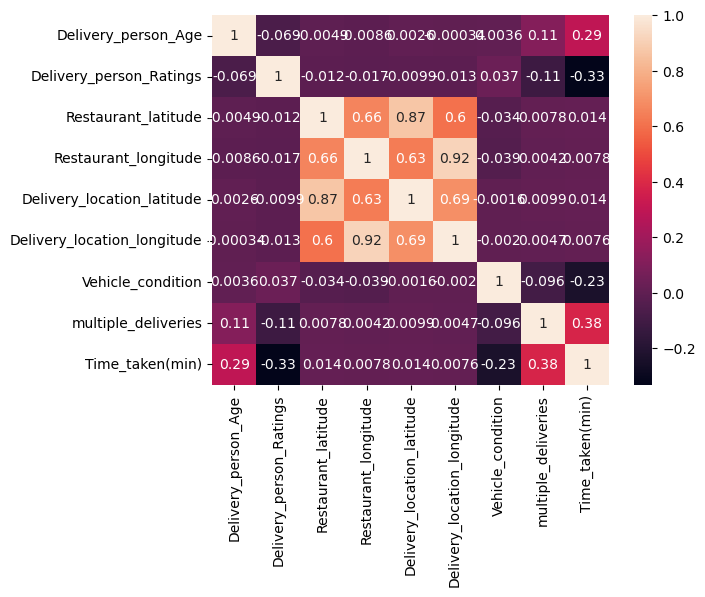

In [15]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [16]:
#Feature Engineering:

#Establishing the new methods to improve the efficiency of model:

#To find the distance using Haversine formula:

import math
#Define the Haversine formula function
def haversine(lat1, lon1, lat2, lon2):
    """Will Predict the distance based on latitudes and longitude"""
    #Convert latitude and longitude from degrees to radians

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    #Radius of the Earth in kilometers
    radius = 6371.0

    #Haversine formulae
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    return distance


#Calculate distances for each row
df['distance_km'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],  row['Delivery_location_latitude'], row['Delivery_location_longitude']),axis =  1)



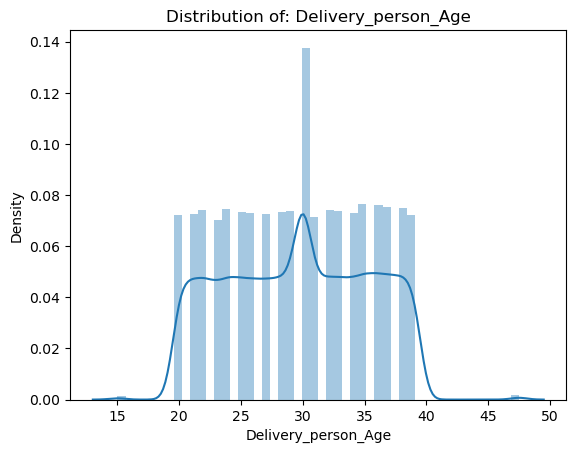

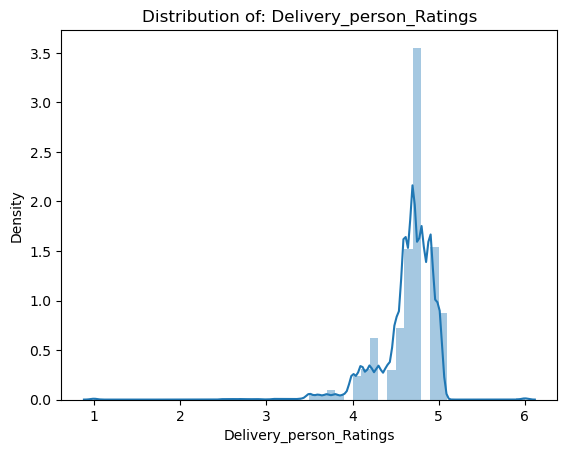

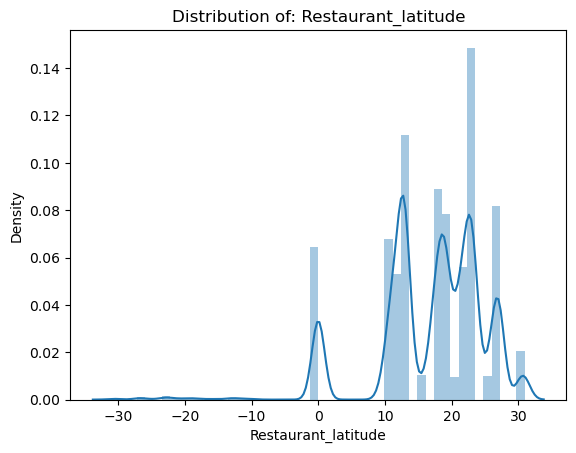

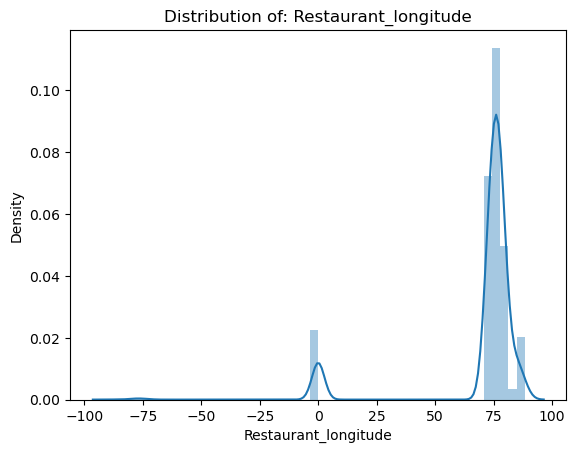

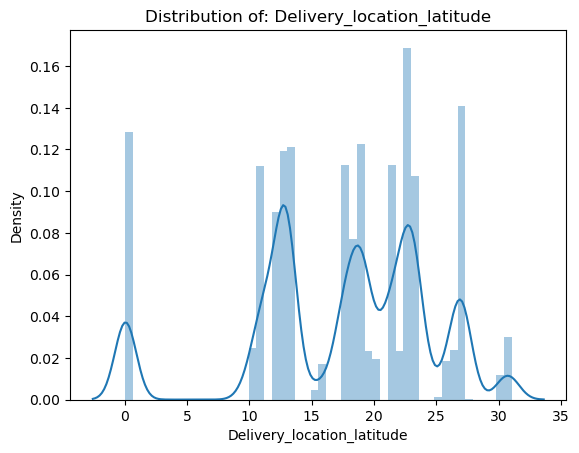

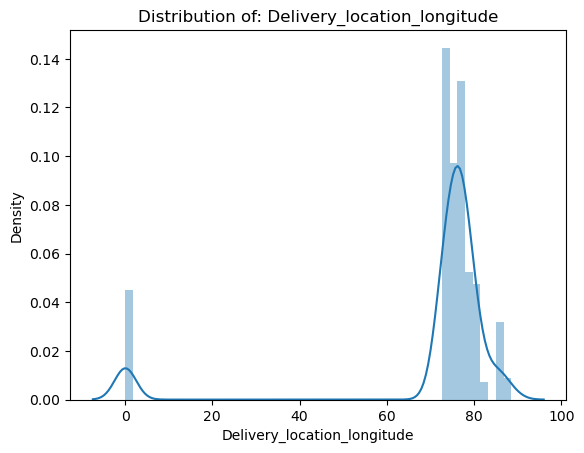

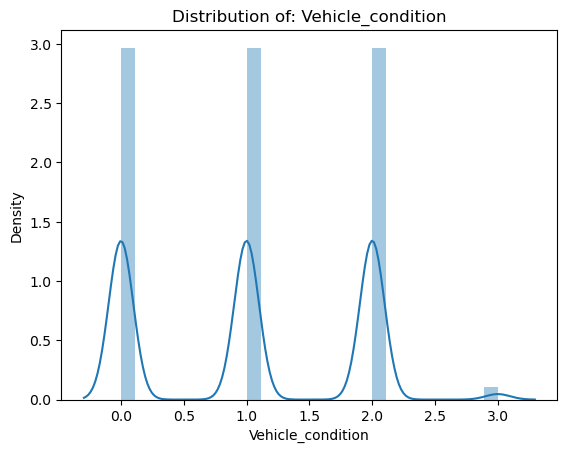

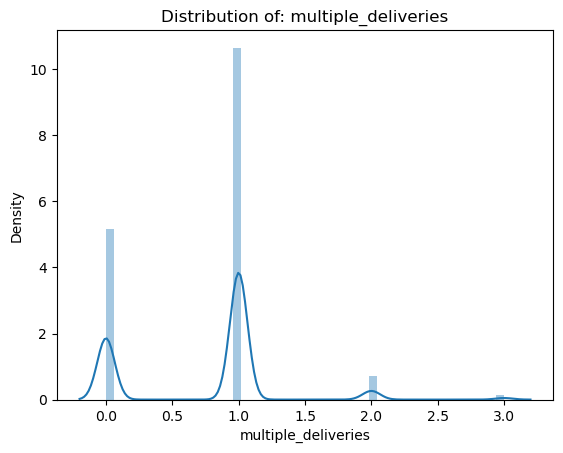

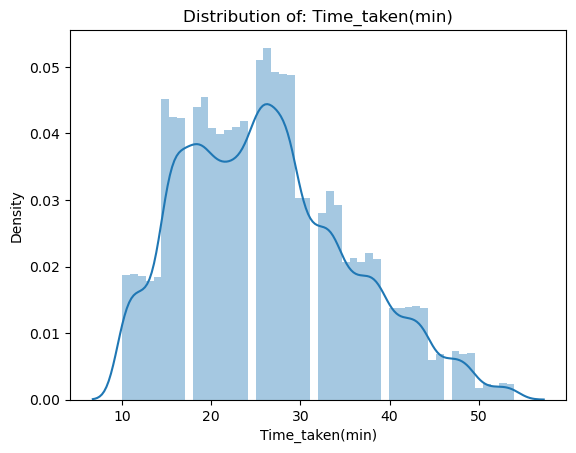

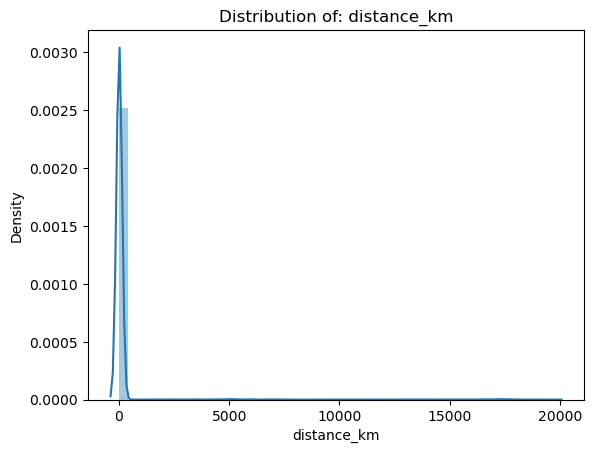

In [17]:
#Visualising the data in the table:

#in terms of Distplot:

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.distplot(df[col])
        plt.title("Distribution of: "+col)
        plt.show()

In [18]:
#Applying Square root Transformation basis on Outliers and Variance:

df['Delivery_person_Ratings'] = np.sqrt(df['Delivery_person_Ratings'])
df['distance_km'] = np.sqrt(df['distance_km'])

In [19]:
#For the Machine learning model all to be in numeric form so 'categorical data' needs to be into 'numerical data'

import pickle
from sklearn.preprocessing import LabelEncoder

#Create a dictionary to store label encoders for each categorical column
label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':

        #create encoder
        le = LabelEncoder()

        #Fit and transform
        df[col] = le.fit_transform(df[col])

        #store in dictionary
        label_encoders[col] = le

        #save to file
        with open(f"{col}.pkl","wb") as f:
            pickle.dump(le, f)

        print("Your column is converted to numeric!")

    else:
        print("Your column doesnt have any objects here!")

Your column doesnt have any objects here!
Your column doesnt have any objects here!
Your column doesnt have any objects here!
Your column doesnt have any objects here!
Your column doesnt have any objects here!
Your column doesnt have any objects here!
Your column is converted to numeric!
Your column is converted to numeric!
Your column is converted to numeric!
Your column is converted to numeric!
Your column doesnt have any objects here!
Your column is converted to numeric!
Your column is converted to numeric!
Your column doesnt have any objects here!
Your column is converted to numeric!
Your column is converted to numeric!
Your column doesnt have any objects here!
Your column doesnt have any objects here!


In [34]:
#Building the Model:

x = df.drop(['Time_taken(min)'],axis = 1)
y = df['Time_taken(min)']
#COL = x.columns.tolist()
for i in range(0,len(x['distance_km'])):
    print(x[i])

KeyError: 0

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [22]:
filename = "ss.pkl"
pickle.dump(ss, open(filename,"wb"))

In [23]:
#Performing Train test split:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [24]:
#Building the Model:

#Regression :  Predicting Values and testing the model performance by using metrics from Regression.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def Predictions(model):
    models = model.fit(X_train, y_train)
    y_pred_test =  models.predict(X_test)
    y_pred_train = models.predict(X_train)
    print("R2 Score for Training:",r2_score(y_pred_train,y_train))
    print("\n")
    print("Mean Squared Error for Training:",mean_squared_error(y_pred_train,y_train))
    print("\n")
    print("Mean Absolute Error for Training:",mean_absolute_error(y_pred_train,y_train))
    print("\n")
    print("R2 Score for Testing:",r2_score(y_pred_test,y_test))
    print("\n")
    print("Mean Squared Error for Testing:",mean_squared_error(y_pred_test,y_test))
    print("\n")
    print("Mean Absolute Error for Testing:",mean_absolute_error(y_pred_test,y_test))
    print("\n")
    

In [25]:
#Model - 1:
#Decision Tree Model:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [26]:
Predictions(dt)

R2 Score for Training: 1.0


Mean Squared Error for Training: 0.0


Mean Absolute Error for Training: 0.0


R2 Score for Testing: 0.6549739070004594


Mean Squared Error for Testing: 30.279855247285887


Mean Absolute Error for Testing: 4.16865884417151




In [27]:
#Model - 2:
#KNN Model:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [28]:
Predictions(knn)

R2 Score for Training: 0.6092396175177444


Mean Squared Error for Training: 23.99359653451774


Mean Absolute Error for Training: 3.8047540713933214


R2 Score for Testing: 0.3903949606810745


Mean Squared Error for Testing: 36.653755894286654


Mean Absolute Error for Testing: 4.731615308696129




In [29]:
#Model - 3:
#XG Boost Model:  high accuracy and high efficiency
#%pip install xgboost
from xgboost import XGBRegressor
xg = XGBRegressor()

In [30]:
Predictions(xg)

R2 Score for Training: 0.8438496589660645


Mean Squared Error for Training: 11.437499122318975


Mean Absolute Error for Training: 2.6831856227047894


R2 Score for Testing: 0.7754384875297546


Mean Squared Error for Testing: 16.367379592052565


Mean Absolute Error for Testing: 3.214468896068728




In [31]:
#Now testing the Model Performances:

#Implementing Random Search CV for XGBoost
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100,200,300,400],
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.7,0.8,0.9,1.0],
    'gamma':[0,0.1,0.2,0.3],
}
scoring = 'neg_mean_squared_error'
random_search = RandomizedSearchCV(
    xg,
    param_distributions =  param_grid,
    n_iter = 24, #number of random samples to try
    scoring = scoring,
    cv = 5, #Number of cross-validation folds
    verbose = 2,#controls the verbosity of the search process
    n_jobs = -1,#Use all available CPU cores for parallel processing
    random_state = 42 #set a random seed for reproducibility
)


In [32]:
Predictions(random_search)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
#now, RandomSearchCV for Decision Tree:

param_dist = {
    'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth': [None] + list(np.arange(1,20)),
    'min_samples_split': list(np.arange(2,21)),
    'min_samples_leaf': list(np.arange(1,21)),
}


In [ ]:
random_search = RandomizedSearchCV(
    dt,param_distributions = param_dist, n_iter = 100, n_jobs = -1,cv = 5, verbose = 2,random_state = 42
)

#Fit the RandomizedSearchCV object to your data
Predictions(random_search)

#Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

#print the best hyperparameters
print("Best Hyperparameters:", best_params)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rd = RandomForestRegressor()


param_dist_1 = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': list(np.arange(2, 21)),
    'min_samples_leaf': list(np.arange(1, 21)),
    'max_features': ['auto', 'sqrt', 'log2']
}










random_search = RandomizedSearchCV(
    estimator=rd,
    param_distributions=param_dist_1,
    n_iter=2,   # small for testing
    cv=2,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


print("x shape:", x.shape)
print("y shape:", y.shape)
#print("Any NaNs in x:", x.isnull().sum().sum())
#print("Any NaNs in y:", pd.isnull(y).sum())
print("Unique values in y:", np.unique(y))


random_search.fit(x, y)
best_model = random_search.best_estimator_


In [ ]:
print(best_model)

In [ ]:
Predictions(best_model)

In [ ]:
#Saving the Best model:(Random Search)

import pickle
filename = "rf.pkl"
pickle.dump(random_search,open(filename,"wb"))